In [1]:
#Import my dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
df = pd.read_csv('XRP.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,0.006040,0.006044,0.005933,0.005955,0.005955,211767
1,2016-01-02,0.005957,0.006079,0.005933,0.006065,0.006065,278539
2,2016-01-03,0.006066,0.006070,0.005988,0.006017,0.006017,291723
3,2016-01-04,0.006019,0.006059,0.005953,0.005958,0.005958,310820
4,2016-01-05,0.005954,0.006044,0.005953,0.006044,0.006044,381554


In [3]:
#preprocessing our data

#.values to convert it to an numpy array - you can also use np.array(data)
df = df['Open'].values

#reshape the data in a structure that keras accepts
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(1829, 1)


array([[0.00604 ],
       [0.005957],
       [0.006066],
       [0.006019],
       [0.005954],
       [0.006044],
       [0.005998]])

In [4]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1463, 1)
(416, 1)


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.00027721],
       [0.0002525 ],
       [0.00028495],
       [0.00027096],
       [0.0002516 ],
       [0.0002784 ],
       [0.0002647 ]])

In [6]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.07973712],
       [0.07901059],
       [0.07639958],
       [0.07708888],
       [0.07742475],
       [0.07459875],
       [0.07486643]])

In [7]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [85]:
x_train, y_train = create_my_dataset(dataset_train)
print(x_train[0])
print(y_train[0])
df.shape

[2.77210306e-04 2.52496605e-04 2.84951947e-04 2.70957442e-04
 2.51603339e-04 2.78401327e-04 2.64704577e-04 2.77210306e-04
 2.46541496e-04 2.59940491e-04 2.54283137e-04 2.33142502e-04
 2.16468198e-04 2.04260225e-04 1.24759525e-04 3.33486082e-05
 2.97755430e-07 4.79386243e-05 6.58039501e-05 4.82363797e-05
 7.77141673e-05 6.10398632e-05 0.00000000e+00 3.57306516e-06
 3.24553419e-05 8.63490748e-06 8.90288736e-05 4.16262091e-04
 3.33188326e-04 5.10650563e-04 4.53183765e-04 3.83806750e-04
 4.27576798e-04 4.94869525e-04 5.27920378e-04 5.52634079e-04
 6.44342751e-04 8.38181536e-04 9.72469235e-04 8.60513193e-04
 8.09299259e-04 8.18231922e-04 8.07810482e-04 8.49198487e-04
 9.39120627e-04 1.03737992e-03 1.04869463e-03 9.96587425e-04
 9.01007932e-04 8.59024416e-04]
0.0009361430726752518


(366, 3)

In [9]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.07973712, 0.07901059, 0.07639958, 0.07708888, 0.07742475,
        0.07459875, 0.07486643, 0.07330947, 0.0710641 , 0.06743118,
        0.06881664, 0.06482821, 0.06352761, 0.06453432, 0.06553954,
        0.06536149, 0.0670316 , 0.06591025, 0.06558867, 0.06384085,
        0.06393256, 0.06286808, 0.06486602, 0.06562023, 0.06650189,
        0.06709144, 0.06560445, 0.06524774, 0.06458434, 0.06393345,
        0.06420768, 0.06326231, 0.0635821 , 0.06017042, 0.05344829,
        0.05692488, 0.05532028, 0.05664231, 0.05624302, 0.05712408,
        0.05534767, 0.05573356, 0.05521755, 0.05517229, 0.05536881,
        0.05598011, 0.05715535, 0.05639756, 0.05591936, 0.05585862]])

In [10]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(1413, 50, 1)
(366, 50, 1)


In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [13]:
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [14]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
1413/1413 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 2/50
1413/1413 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 3/50
1413/1413 [==============================] - 4s 3ms/step - loss: 0.0018
Epoch 4/50
1413/1413 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 5/50
1413/1413 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 6/50
1413/1413 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 7/50
1413/1413 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 8/50
1413/1413 [==============================] - 4s 3ms/step - loss: 9.1791e-04
Epoch 9/50
1413/1413 [==============================] - 4s 3ms/step - loss: 8.6009e-04
Epoch 10/50
1413/1413 [==============================] - 4s 3ms/step - loss: 9.2714e-04
Epoch 11/50
1413/1413 [==============================] - 4s 3ms/step - loss: 7.6790e-04
Epoch 12/50
1413/1413 [==============================] - 4s 3ms/step 

range(1463, 1829)


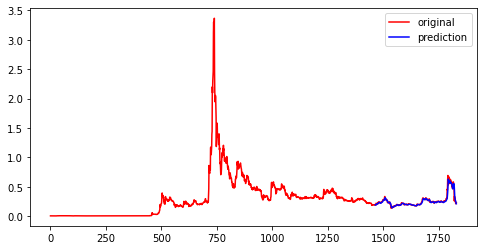

In [15]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='original')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions,color='blue', label='prediction')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

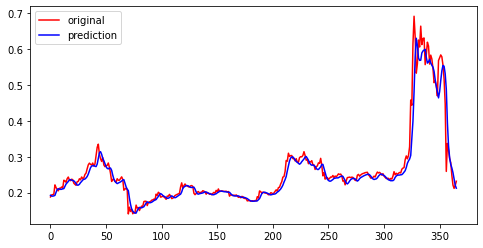

In [16]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label = 'original')
plt.plot(predictions, color='blue', label = 'prediction')
plt.legend()

In [62]:
s1 = pd.Series([y_test_scaled])
s2 = pd.Series([predictions])

a1 = []
a2 = []
for x in s1[0]:
    a1.append(x[0])
for x in s2[0]:
    a2.append(x[0])
    
a3 = []
for x in range(len(a1)):
    a3.append(a1[x] - a2[x])
    
d = {'actual': a1, 'predicted': a2, 'diff': a3}
df = pd.DataFrame(data=d)
df


,actual,predicted,diff
0,0.187948,0.192493,-0.004545
1,0.193521,0.190536,0.002985
2,0.194367,0.190127,0.004240
3,0.195536,0.190882,0.004654
4,0.221576,0.192209,0.029367
...,...,...,...
361,0.247673,0.268789,-0.021116
362,0.220902,0.255668,-0.034766
363,0.211787,0.237693,-0.025906
364,0.219845,0.220889,-0.001044


In [135]:
#y_test[-51:-1]
#scaler.inverse_transform(y_test[-51:-1].reshape(-1,1))
print(x_test.shape)
print(y_test[-51:-1].shape)
k = np.reshape(y_test[-51:-1], (1,x_train.shape[1],1))
print(k.shape)
p = model.predict(k)

new = np.array(y_test[-51:-1])
print(new)

(366, 50, 1)
(50,)
(1, 50, 1)
[0.07437752 0.07744083 0.07837906 0.07876584 0.08536261 0.08851912
 0.08608497 0.08892674 0.0961628  0.13495318 0.13059315 0.18135807
 0.20457138 0.18752131 0.15729645 0.16512504 0.18479685 0.17900461
 0.19634172 0.18100046 0.1860632  0.18650209 0.16435474 0.17249121
 0.18300198 0.17976954 0.1648249  0.17226581 0.16911109 0.16114732
 0.14934489 0.15081283 0.14666807 0.13832764 0.16774916 0.17020564
 0.17242749 0.17087618 0.16401917 0.15235639 0.13186308 0.07563107
 0.0989209  0.09318703 0.08624456 0.08285253 0.07222475 0.06425354
 0.0615395  0.06393881]
